# SAR PLAYGROUND

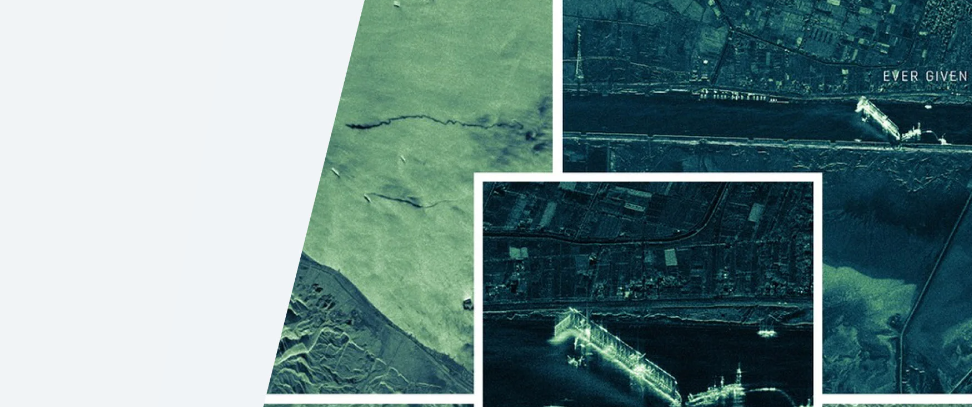

# Installation and Setup

In [ ]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
%pip install -U openmim
!mim install "mmengine>=0.7.0"
!mim install "mmcv>=2.0.0rc4"

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

%pip install -e .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.3/297.3 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 32.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.8/449.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 31.3 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 MB 8.2 MB/s eta 0:00:00
Cloning into 'mmdetection'...
remote: Enumerating objects: 37590, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 37590 (delta 65), reused 135 (delta 56), pack-reused 37399
Receiving objects: 100% (37590/37590), 62.97 MiB | 23.58 MiB/s, done.
Resolving deltas: 100% (25906/25906), done.
/content/mmdetection
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


In [ ]:
!pip install tensorrt
import tensorrt
print(tensorrt.__version__)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Download Checkpoint

In [ ]:
%pwd

'/content'

In [ ]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir ./checkpoints
!mim download mmdet --config tood_r50_fpn_ms-2x_coco --dest ./checkpoints


processing tood_r50_fpn_ms-2x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.1/123.1 MiB 37.6 MB/s eta 0:00:00
Successfully downloaded tood_r50_fpn_mstrain_2x_coco_20211210_144231-3b23174c.pth to /content/checkpoints
Successfully dumped tood_r50_fpn_ms-2x_coco.py to /content/checkpoints


# Inference with pretrained model

In [ ]:
from mmdet.apis import DetInferencer
import warnings
warnings.filterwarnings('ignore')

# Choose to use a config
model_name = 'tood_r50_fpn_ms-2x_coco'
# Setup a checkpoint file to load
checkpoint = '/content/checkpoints/tood_r50_fpn_mstrain_2x_coco_20211210_144231-3b23174c.pth'

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(model_name, checkpoint, device)

# Use the detector to do inference
img = "/content/Test.jpg" # Upload an image and specify the path here
result = inferencer(img, out_dir='/content/output')

Loads checkpoint by local backend from path: /content/checkpoints/tood_r50_fpn_mstrain_2x_coco_20211210_144231-3b23174c.pth
10/28 04:38:07 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


Output()

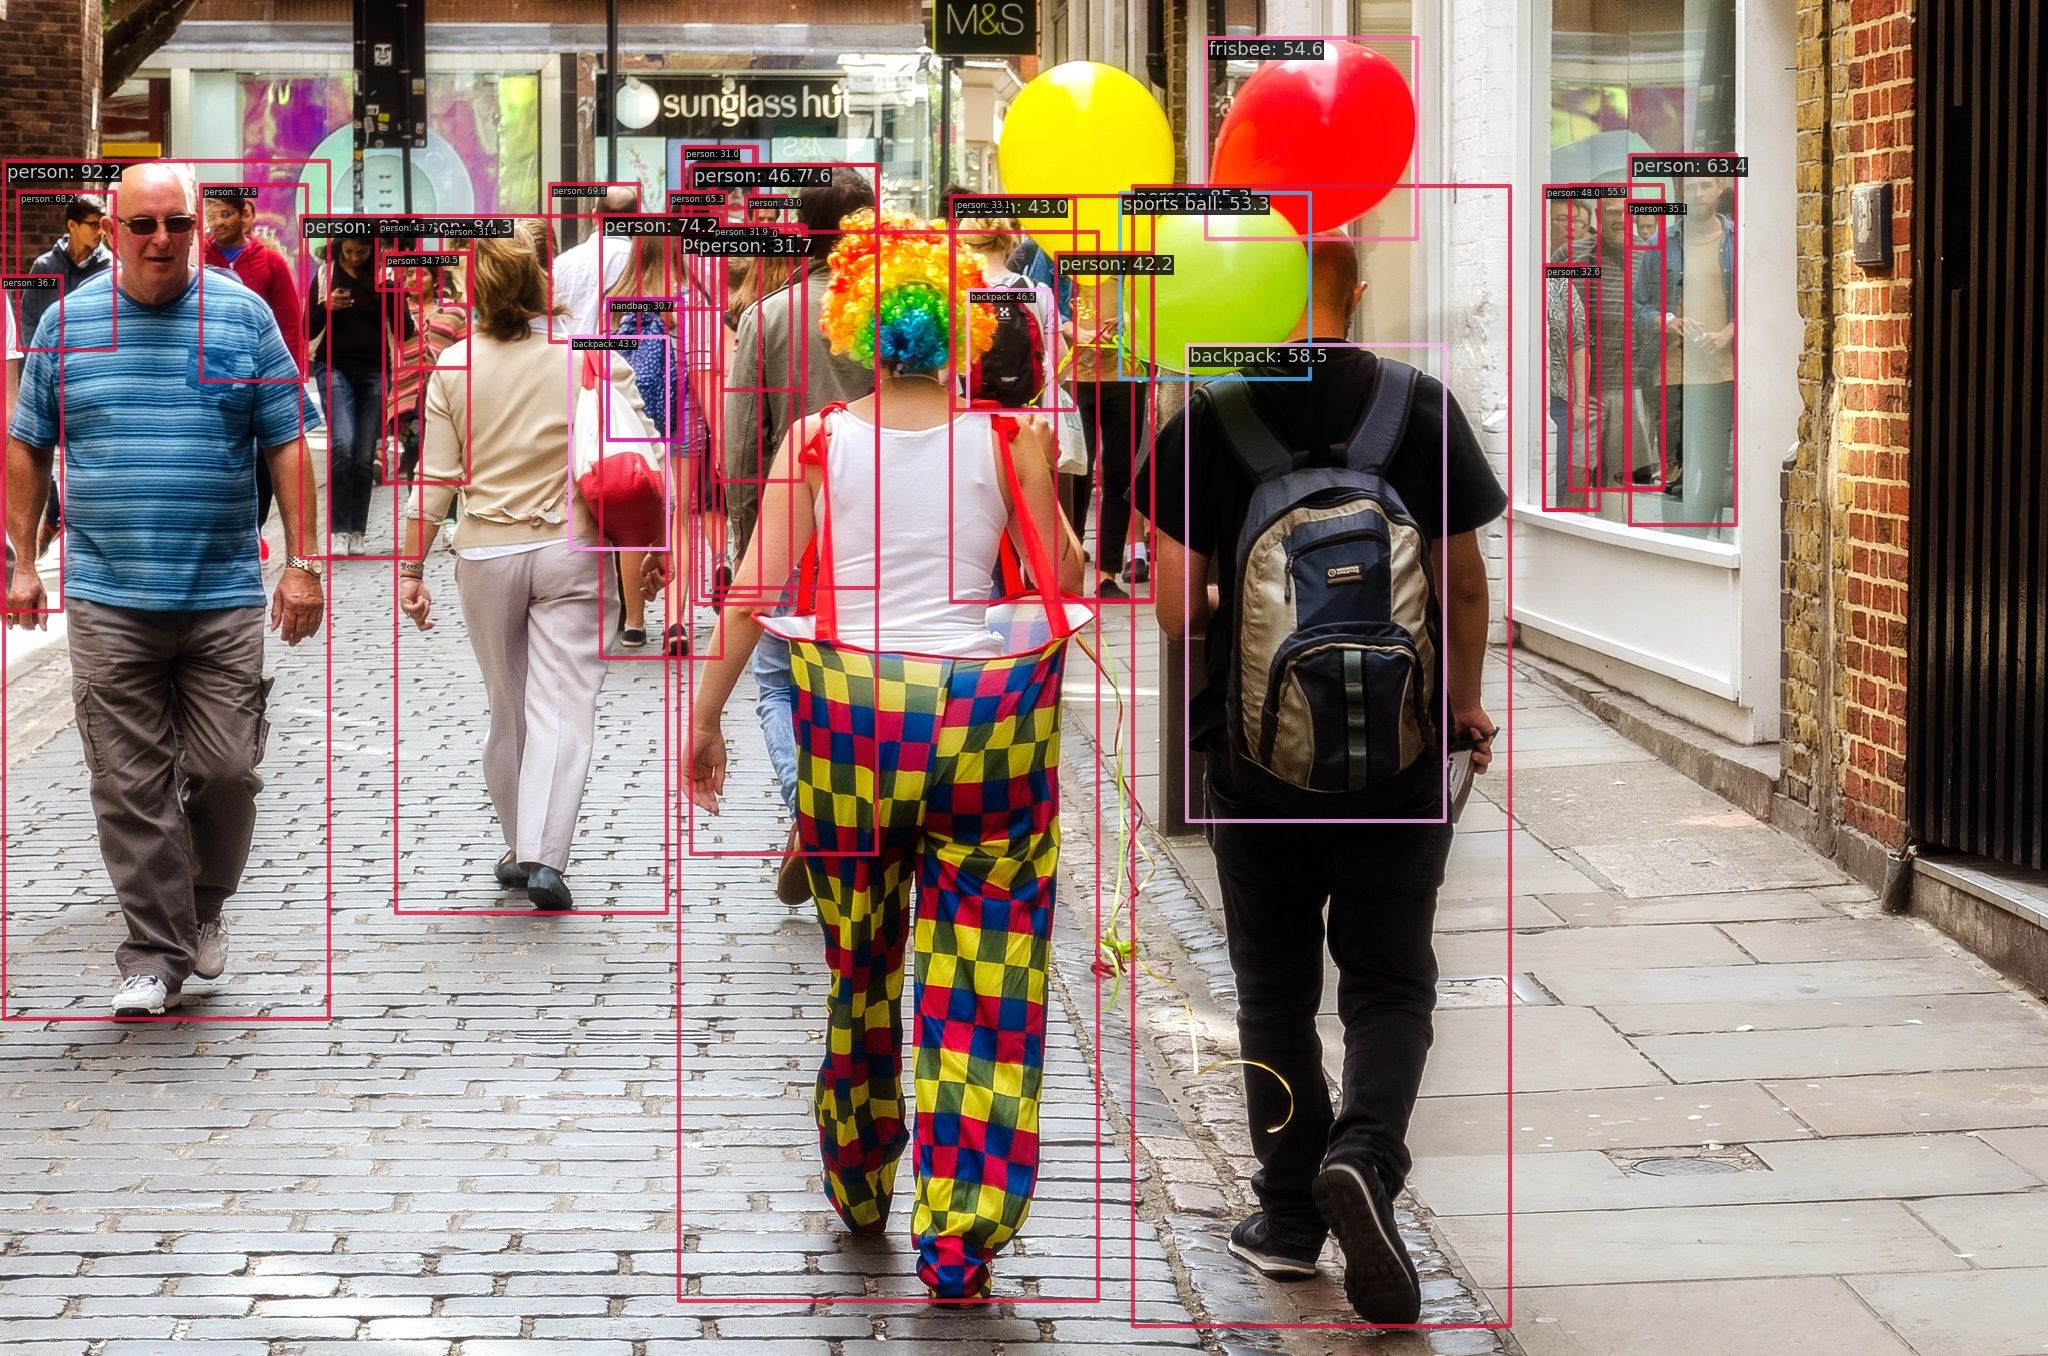

In [ ]:
# Show the output image
from PIL import Image
Image.open("/content/output/vis/Test.jpg")

# Prepare a config

The second step is to prepare a config thus the dataset could be successfully loaded.


In [ ]:
config = """
# Inherit and overwrite part of the config based on this config
_base_ = './tood_r50_fpn_ms-2x_coco.py'



data_root = '/content/drive/MyDrive/SAR_Data/SSDD-OPEN' # dataset root

train_batch_size_per_gpu = 4
train_num_workers = 4

max_epochs = 15
stage2_num_epochs = 1
base_lr = 0.00008


metainfo = {
    'classes': ('ship', ),
    'palette': [
        (220, 20, 60),
    ]
}

train_dataloader = dict(
    batch_size=train_batch_size_per_gpu,
    num_workers=train_num_workers,
    dataset=dict(
        data_root=data_root,
        metainfo=metainfo,
        data_prefix=dict(img='train/'),
        ann_file='/content/drive/MyDrive/SAR_Data/SSDD-OPEN/train/train.json'))

val_dataloader = dict(
    dataset=dict(
        data_root=data_root,
        metainfo=metainfo,
        data_prefix=dict(img='valid/'),
        ann_file='/content/drive/MyDrive/SAR_Data/SSDD-OPEN/valid/valid.json'))

test_dataloader = dict(
    dataset=dict(
        data_root=data_root,
        metainfo=metainfo,
        data_prefix=dict(img='test/'),
        ann_file='/content/drive/MyDrive/SAR_Data/SSDD-OPEN/test/test.json'))

val_evaluator = dict(ann_file= '/content/drive/MyDrive/SAR_Data/SSDD-OPEN/valid/valid.json')

test_evaluator = dict(ann_file= '/content/drive/MyDrive/SAR_Data/SSDD-OPEN/test/test.json')



# learning rate
param_scheduler = [
    dict(
        type='LinearLR',
        start_factor=1.0e-5,
        by_epoch=False,
        begin=0,
        end=10),
    dict(
        # use cosine lr from 10 to 20 epoch
        type='CosineAnnealingLR',
        eta_min=base_lr * 0.05,
        begin=max_epochs // 2,
        end=max_epochs,
        T_max=max_epochs // 2,
        by_epoch=True,
        convert_to_iter_based=True),
]

train_pipeline_stage2 = [
    dict(type='LoadImageFromFile', backend_args=None),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='RandomResize',
        scale=(640, 640),
        ratio_range=(0.1, 2.0),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=(640, 640)),
    dict(type='YOLOXHSVRandomAug'),
    dict(type='RandomFlip', prob=0.5),
    dict(type='Pad', size=(640, 640), pad_val=dict(img=(114, 114, 114))),
    dict(type='PackDetInputs')
]

# optimizer
optim_wrapper = dict(
    _delete_=True,
    type='OptimWrapper',
    optimizer=dict(type='AdamW', lr=base_lr, weight_decay=0.05),
    paramwise_cfg=dict(
        norm_decay_mult=0, bias_decay_mult=0, bypass_duplicate=True))

default_hooks = dict(
    checkpoint=dict(
        interval=5,
        max_keep_ckpts=2,  # only keep latest 2 checkpoints
        save_best='auto'
    ),
    logger=dict(type='LoggerHook', interval=5))

custom_hooks = [
    dict(
        type='PipelineSwitchHook',
        switch_epoch=max_epochs - stage2_num_epochs,
        switch_pipeline=train_pipeline_stage2)
]

# load COCO pre-trained weight
load_from = '/content/checkpoints/tood_r50_fpn_mstrain_2x_coco_20211210_144231-3b23174c.pth'

train_cfg = dict(type='EpochBasedTrainLoop', max_epochs=max_epochs, val_interval=1)
visualizer = dict(vis_backends=[dict(type='LocalVisBackend'),dict(type='TensorboardVisBackend')])
"""

with open('/content/mmdetection/configs/tood/tood_r50_fpn_ms-2x_SSDD-OPEN.py', 'w') as f:
    f.write(config)

# Run the training script

In [ ]:
!python /content/mmdetection/tools/train.py --work-dir /content/work_dirs /content/mmdetection/configs/tood/tood_r50_fpn_ms-2x_SSDD-OPEN.py

10/28 04:44:55 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 991940670
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60

In [ ]:
# load tensorboard in colab
%load_ext tensorboard
# see curves in tensorboard
%tensorboard --logdir

In [ ]:
!zip -r /content/work_dirs.zip /content/work_dirs

  adding: content/work_dirs/ (stored 0%)
  adding: content/work_dirs/last_checkpoint (stored 0%)
  adding: content/work_dirs/tood_r50_fpn_ms-2x_SSDD-OPEN.py (deflated 79%)
  adding: content/work_dirs/epoch_15.pth (deflated 8%)
  adding: content/work_dirs/epoch_13.pth (deflated 8%)
  adding: content/work_dirs/20231028_044453/ (stored 0%)
  adding: content/work_dirs/20231028_044453/vis_data/ (stored 0%)
  adding: content/work_dirs/20231028_044453/vis_data/events.out.tfevents.1698468299.e1546ea8fbe3.3848.0 (deflated 69%)
  adding: content/work_dirs/20231028_044453/vis_data/config.py (deflated 79%)
  adding: content/work_dirs/20231028_044453/vis_data/scalars.json (deflated 76%)
  adding: content/work_dirs/20231028_044453/vis_data/20231028_044453.json (deflated 76%)
  adding: content/work_dirs/20231028_044453/20231028_044453.log (deflated 90%)
  adding: content/work_dirs/best_coco_bbox_mAP_epoch_13.pth (deflated 8%)


From the tensorboard, we can observe that changes of loss and learning rate. We can see the losses of each branch gradually decrease as the training goes by.

## Test the Trained Detector

After finetuning the detector, let's visualize the prediction results!

In [ ]:
from mmdet.apis import DetInferencer
import glob
import warnings
from PIL import Image
warnings.filterwarnings('ignore')

# Choose to use a config
config = '/content/mmdetection/configs/rtmdet/rtmdet_tiny_1xb4-20e_SSDD-OPEN.py'
# Setup a checkpoint file to load
checkpoint = glob.glob('/content/work_dirs/best_coco_bbox_mAP_epoch_14.pth')[0]

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(config, checkpoint, device)

# Use the detector to do inference
img = '/content/P0001_600_1400_8400_9200.jpg'
result = inferencer(img, out_dir='/content/output/')

Loads checkpoint by local backend from path: /content/work_dirs/best_coco_bbox_mAP_epoch_14.pth


Output()

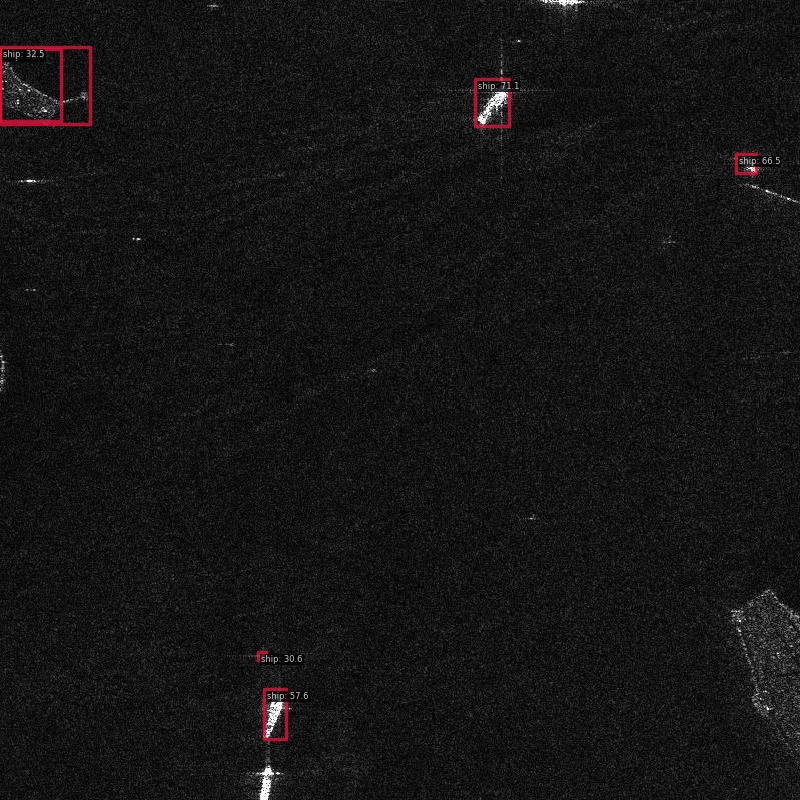

In [ ]:
# Show the output image
Image.open("/content/output/vis/P0001_600_1400_8400_9200.jpg")